In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
df = pd.read_csv('datasets/train_burnout.csv')
df.shape

(22750, 9)

##### Feature Organization

In [3]:
target = "Burn Rate"
features = list(set(df.columns) - set([target]))
numerical = df[features].select_dtypes(include=np.number).columns.tolist()
categorical = [col for col in features if col not in numerical]

print(f"Target feature:\n {target}\n")
print(f"Numerical features:\n{numerical}\n")
print("Categorical features:\n", categorical)

Target feature:
 Burn Rate

Numerical features:
['Resource Allocation', 'Mental Fatigue Score', 'Designation']

Categorical features:
 ['Company Type', 'Gender', 'Employee ID', 'Date of Joining', 'WFH Setup Available']


## Distributions

##### Numerical

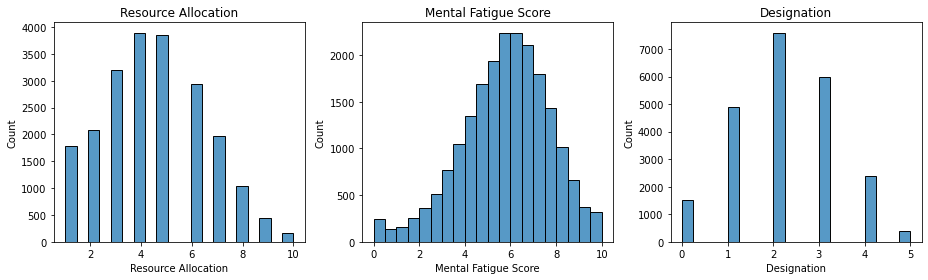

In [4]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 4))
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i+1)
    sns.histplot(x=col, bins=20, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()   

##### Categorical

In [5]:
df[categorical].nunique()

Company Type               2
Gender                     2
Employee ID            22750
Date of Joining          366
WFH Setup Available        2
dtype: int64

In [6]:
plotable_categorical = [col for col in categorical if df[categorical][col].nunique() < 10]
print(f"Plotable Categorical features:\n {plotable_categorical}\n")

Plotable Categorical features:
 ['Company Type', 'Gender', 'WFH Setup Available']



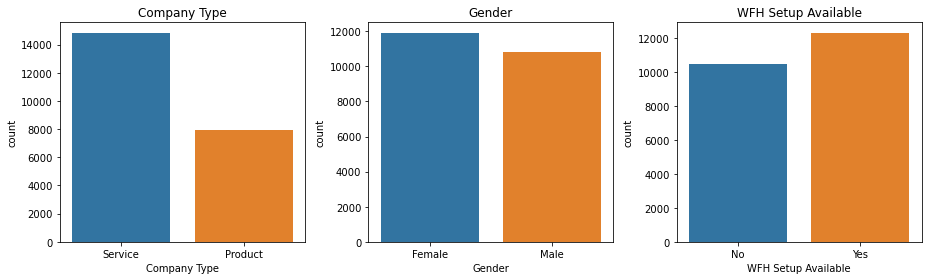

In [7]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 4))
for i, col in enumerate(plotable_categorical):
    plt.subplot(rows, cols, i+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show() 

## Relations between features

##### Numerical vs Numerical

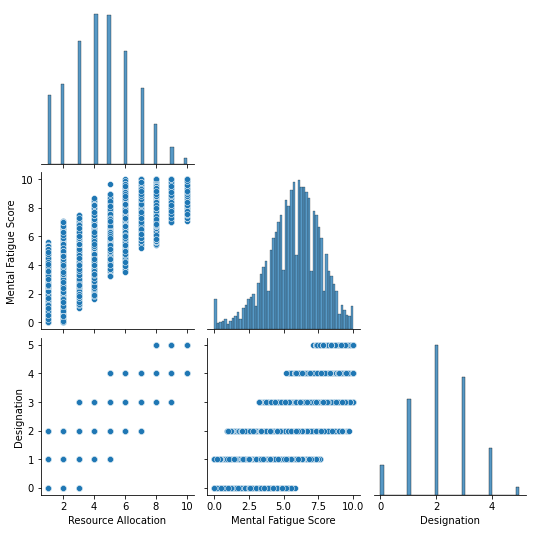

In [8]:
sns.pairplot(df[numerical], height=2.5, corner=True);

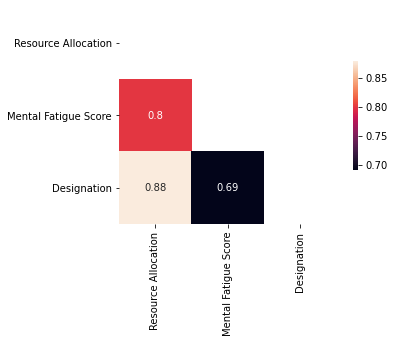

In [9]:
corr = df[numerical].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, square=True, cbar_kws={"shrink": .5});

##### Numerical vs Target

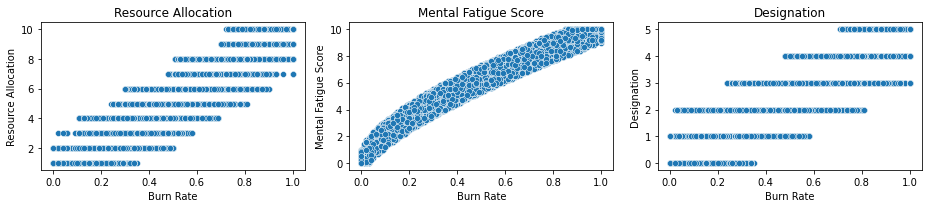

In [10]:
rows = 1
cols = 3
fig = plt.figure(figsize=(13, 3))
for i, col in enumerate(numerical):
    plt.subplot(rows, cols, i+1)
    sns.scatterplot(x=target, y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Preprocessing

##### NA removal

In [11]:
df.isna().sum() / df.shape[0]

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     0.060703
Mental Fatigue Score    0.093055
Burn Rate               0.049407
dtype: float64

In [12]:
df.shape

(22750, 9)

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(18590, 9)

##### Splitting

In [15]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14872, 8), (3718, 8), (14872,), (3718,))

## Feature preprocessing

##### Train Set

In [16]:
from datetime import datetime

In [17]:
X_train["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_train["Date of Joining"]).year 

<ipython-input-17-5d7084c4c2fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_train["Date of Joining"]).year


In [18]:
X_train = X_train.drop(columns=["Employee ID", "Date of Joining"])
X_train.head()

,Company Type,Resource Allocation,Mental Fatigue Score,Gender,WFH Setup Available,Designation,Years in Company
19000,Product,6.0,8.8,Male,Yes,2,13
19405,Service,7.0,7.1,Male,No,3,13
9965,Product,3.0,6.0,Female,No,2,13
613,Product,6.0,4.9,Female,No,3,13
3475,Product,1.0,0.6,Male,No,0,13


In [19]:
X_train = pd.get_dummies(X_train, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)
X_train.head()

,Resource Allocation,Mental Fatigue Score,Designation,Years in Company,Gender_Male,Company Type_Service,WFH Setup Available_Yes
19000,6.0,8.8,2,13,1,0,1
19405,7.0,7.1,3,13,1,1,0
9965,3.0,6.0,2,13,0,0,0
613,6.0,4.9,3,13,0,0,0
3475,1.0,0.6,0,13,1,0,0


In [20]:
X_train.describe()

,Resource Allocation,Mental Fatigue Score,Designation,Years in Company,Gender_Male,Company Type_Service,WFH Setup Available_Yes
count,14872.000000,14872.000000,14872.000000,14872.0,14872.000000,14872.000000,14872.000000
mean,4.486148,5.726668,2.179263,13.0,0.476062,0.654250,0.540075
std,2.046352,1.923612,1.134078,0.0,0.499443,0.475628,0.498408
min,1.000000,0.000000,0.000000,13.0,0.000000,0.000000,0.000000
25%,3.000000,4.600000,1.000000,13.0,0.000000,0.000000,0.000000
50%,4.000000,5.900000,2.000000,13.0,0.000000,1.000000,1.000000
75%,6.000000,7.100000,3.000000,13.0,1.000000,1.000000,1.000000
max,10.000000,10.000000,5.000000,13.0,1.000000,1.000000,1.000000


In [21]:
X_train = X_train.drop(columns=["Years in Company"])
X_train.head()

,Resource Allocation,Mental Fatigue Score,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
19000,6.0,8.8,2,1,0,1
19405,7.0,7.1,3,1,1,0
9965,3.0,6.0,2,0,0,0
613,6.0,4.9,3,0,0,0
3475,1.0,0.6,0,1,0,0


##### Test Set

In [22]:
X_test["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_test["Date of Joining"]).year 

<ipython-input-22-f98bf03a22ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["Years in Company"] = datetime.now().year - pd.DatetimeIndex(X_test["Date of Joining"]).year


In [23]:
X_test = X_test.drop(columns=["Employee ID", "Date of Joining"])

In [24]:
X_test = pd.get_dummies(X_test, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

In [25]:
X_test = X_test.drop(columns=["Years in Company"])

In [26]:
X_test.head()

,Resource Allocation,Mental Fatigue Score,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
8815,2.0,3.9,1,1,1,1
10896,4.0,5.2,2,1,1,1
16049,4.0,4.6,3,1,1,0
1746,4.0,6.8,2,0,1,1
5473,9.0,7.8,4,1,1,1


In [27]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True])

## Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train_norm = mm_scaler.transform(X_train)

In [31]:
X_train_norm = pd.DataFrame(X_train_norm)
X_train_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,0,1,2,3,4,5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.387350,0.572667,0.435853,0.476062,0.654250,0.540075
std,0.227372,0.192361,0.226816,0.499443,0.475628,0.498408


In [32]:
X_train_norm.columns = X_train.columns

In [33]:
X_train_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Resource Allocation,Mental Fatigue Score,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.387350,0.572667,0.435853,0.476062,0.654250,0.540075
std,0.227372,0.192361,0.226816,0.499443,0.475628,0.498408


##### Test Set

In [34]:
mm_scaler.fit(X_test)

MinMaxScaler()

In [35]:
X_test_norm = mm_scaler.transform(X_test)

In [36]:
X_test_norm = pd.DataFrame(X_test_norm)
X_test_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,0,1,2,3,4,5
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,0.387574,0.575420,0.435987,0.47418,0.657343,0.537386
std,0.226566,0.190834,0.225914,0.49940,0.474662,0.498667


In [37]:
X_test_norm.columns = X_test.columns

In [38]:
X_test_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Resource Allocation,Mental Fatigue Score,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,0.387574,0.575420,0.435987,0.47418,0.657343,0.537386
std,0.226566,0.190834,0.225914,0.49940,0.474662,0.498667


# Fitting to Model

In [39]:
from sklearn import metrics

In [40]:
def evaluate_reg_set(reg, X, y):
    y_pred = reg.predict(X)    
    RMSE = metrics.mean_squared_error(y, y_pred, squared=False)
    r2 = metrics.r2_score(y, y_pred)
    return RMSE, r2

In [41]:
def evaluate_reg_model(reg, X_train, y_train, X_test, y_test):
    RMSE_train, r2_train = evaluate_reg_set(reg, X_train, y_train)
    RMSE_test, r2_test = evaluate_reg_set(reg, X_test, y_test)
    
    print(f"Regression Model: {reg}\n")
    print("Train Metrics:")
    print(f"RMSE: {RMSE_train}")
    print(f"R2: {r2_train}\n")
    print("Test Metrics:")
    print(f"RMSE: {RMSE_test}")
    print(f"R2: {r2_test}")

##### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_norm, y_train)

LinearRegression()

In [44]:
evaluate_reg_model(linear_reg, X_train_norm, y_train, X_test_norm, y_test)

Regression Model: LinearRegression()

Train Metrics:
RMSE: 0.055819989005978135
R2: 0.920765848922243

Test Metrics:
RMSE: 0.055352126446872936
R2: 0.9202219777928837


In [45]:
y_pred = linear_reg.predict(X_test)

In [46]:
error_df = np.concatenate([y_pred,y_test.values])

In [47]:
error_df.shape

(7436,)

###### Saving the model

In [48]:
# import pickle

# MODEL_FILENAME = 'stress_model.pkl'

# with open(MODEL_FILENAME, 'wb') as file:
#     pickle.dump(linear_reg, file)

##### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
evaluate_reg_model(forest_reg, X_train, y_train, X_test, y_test)

Regression Model: RandomForestRegressor()

Train Metrics:
RMSE: 0.04364767730514498
R2: 0.9515543048885737

Test Metrics:
RMSE: 0.05798625763906186
R2: 0.9124482547550272


# Data Modeling 2

## TRAIN

In [54]:
df_2 = X_train.copy()
df_2['Burnout Rate'] = y_train
df_2['Mental Fatigue Score'] = df_2['Mental Fatigue Score'].round(0).astype(int)

**NEW QUESTIONS**

Did you experience difficulties concentrating during work? 
⇒ Integer between 0 and 5

How often do you experience headaches?
⇒ Integer between 0 and 5

How often do you experience trouble falling asleep or staying asleep ?
⇒ Integer between 0 and 5

Have you experienced any change in your appetite?
⇒ Integer between 0 and 5

Have you experienced unexpected weight gain or weight loss?
⇒ Yes/No

Have you felt apathetic about activities that usually bring you joy?
⇒ Yes/No

Have you experienced a lack of motivation either professionally or personnally ?
⇒ Integer between 0 and 5


In [55]:
df_2.shape

(14872, 7)

In [56]:
# Generating the data for new questions
random_data_0 = np.random.randint(0,6,size=(df_2.shape[0]*100, 5))
random_data_1 = np.random.randint(0, 2, size=(df_2.shape[0]*100, 2))
random_data = np.concatenate([random_data_0,random_data_1], axis=1)

columns = ['concentration_score', 'headache_score', 'sleep_score',
            'appetite_score','motivation_score','weight_score', 
             'apathy_score']
df_generated = pd.DataFrame(data=random_data, columns=columns)

# Option 1 - We take the mean and scale it for the score to be between 0 and 10
df_generated['total_score_normalized'] = (df_generated.sum(axis=1)*10/27).round(0).astype(int)

In [57]:
for i in range(11):
    df_mental = df_2[df_2['Mental Fatigue Score']==i]
    df_generated_mental = df_generated[df_generated['total_score_normalized']==i]

    if df_mental.shape[0] > df_generated_mental.shape[0]:
        pass
    else:
        df_generated_mental =  df_generated_mental.iloc[:df_mental.shape[0]].reset_index(drop=True)
        df_mental = df_mental.reset_index(drop=True)

    df_cache = pd.concat([df_mental, df_generated_mental], axis=1, ignore_index=True)
    df_cache.columns = list(df_mental.columns) + list(df_generated_mental.columns)
    df_cache.drop(['Mental Fatigue Score'], axis=1, inplace=True)
    if i==0:
        df_concat = df_cache
    else:
        df_concat = pd.concat([df_concat, df_cache], axis=0, ignore_index=True)


In [58]:
# New DataFrame to work on
df_concat.shape

(14872, 14)

In [59]:
df_2.shape

(14872, 7)

In [60]:
df_concat

,Resource Allocation,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes,Burnout Rate,concentration_score,headache_score,sleep_score,appetite_score,motivation_score,weight_score,apathy_score,total_score_normalized
0,2.0,1,1,0,1,0.02,0,0,0,0,0,0,1,0
1,1.0,0,1,1,1,0.00,0,0,0,0,0,0,0,0
2,2.0,1,0,0,1,0.00,0,0,0,1,0,0,0,0
3,1.0,1,1,1,0,0.00,0,0,0,1,0,0,0,0
4,2.0,1,0,0,0,0.00,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14867,9.0,5,0,0,0,1.00,5,5,5,5,5,0,1,10
14868,10.0,4,0,1,0,0.98,5,5,4,5,5,1,1,10
14869,9.0,5,1,1,0,0.88,4,5,5,5,5,1,1,10
14870,7.0,4,0,1,0,0.82,5,5,5,5,4,1,1,10


In [61]:
y_train_concat = df_concat['Burnout Rate']
y_train_concat

0        0.02
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
14867    1.00
14868    0.98
14869    0.88
14870    0.82
14871    0.82
Name: Burnout Rate, Length: 14872, dtype: float64

In [62]:
X_train_concat = df_concat.drop(columns=['Burnout Rate', 'total_score_normalized'])

In [63]:
X_train_concat.shape

(14872, 12)

##### Scaling

In [65]:
mm_scaler2 = MinMaxScaler()
mm_scaler2.fit(X_train_concat)

MinMaxScaler()

In [68]:
X_train_concat_norm = mm_scaler2.transform(X_train_concat)
X_train_concat_norm = pd.DataFrame(X_train_concat_norm)
X_train_concat_norm.columns = X_train_concat.columns

In [71]:
X_train_concat_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Resource Allocation,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes,concentration_score,headache_score,sleep_score,appetite_score,motivation_score,weight_score,apathy_score
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.387350,0.435853,0.476062,0.654250,0.540075,0.570992,0.575941,0.570818,0.574233,0.571006,0.528644,0.532006
std,0.227372,0.226816,0.499443,0.475628,0.498408,0.349899,0.346180,0.348911,0.348377,0.347698,0.499196,0.498991


## TEST

In [75]:
X_test_2 = X_test.copy()
X_test_2['Burnout Rate'] = y_test
X_test_2['Mental Fatigue Score'] = X_test_2['Mental Fatigue Score'].round(0).astype(int)

In [76]:
X_test_2.shape

(3718, 7)

In [77]:
# Generating the data for new questions
random_data_0 = np.random.randint(0,6,size=(X_test_2.shape[0]*100, 5))
random_data_1 = np.random.randint(0, 2, size=(X_test_2.shape[0]*100, 2))
random_data = np.concatenate([random_data_0,random_data_1], axis=1)

columns = ['concentration_score', 'headache_score', 'sleep_score',
            'appetite_score','motivation_score','weight_score', 
             'apathy_score']
df_generated_test = pd.DataFrame(data=random_data, columns=columns)

# Option 1 - We take the mean and scale it for the score to be between 0 and 10
df_generated_test['total_score_normalized'] = (df_generated_test.sum(axis=1)*10/27).round(0).astype(int)

In [78]:
for i in range(11):
    df_mental_test = X_test_2[X_test_2['Mental Fatigue Score']==i]
    df_generated_mental_test = df_generated_test[df_generated_test['total_score_normalized']==i]

    if df_mental_test.shape[0] > df_generated_mental_test.shape[0]:
        pass
    else:
        df_generated_mental_test =  df_generated_mental_test.iloc[:df_mental_test.shape[0]].reset_index(drop=True)
        df_mental_test = df_mental_test.reset_index(drop=True)

    df_cache = pd.concat([df_mental_test, df_generated_mental_test], axis=1, ignore_index=True)
    df_cache.columns = list(df_mental_test.columns) + list(df_generated_mental_test.columns)
    df_cache.drop(['Mental Fatigue Score'], axis=1, inplace=True)
    if i==0:
        df_concat_test = df_cache
    else:
        df_concat_test = pd.concat([df_concat_test, df_cache], axis=0, ignore_index=True)


In [84]:
df_concat_test.shape

(3718, 14)

In [85]:
y_test_concat = df_concat_test['Burnout Rate']
y_test_concat

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
3713    0.82
3714    0.94
3715    0.90
3716    0.92
3717    0.86
Name: Burnout Rate, Length: 3718, dtype: float64

In [86]:
X_test_concat = df_concat_test.drop(columns=['Burnout Rate', 'total_score_normalized'])

In [87]:
X_test_concat.shape

(3718, 12)

##### Scaling

In [88]:
mm_scaler2.fit(X_test_concat)

MinMaxScaler()

In [89]:
X_test_concat_norm = mm_scaler2.transform(X_test_concat)
X_test_concat_norm = pd.DataFrame(X_test_concat_norm)
X_test_concat_norm.columns = X_test_concat.columns

In [90]:
X_test_concat_norm.describe().loc[['min', 'max', 'mean', 'std'], :]

,Resource Allocation,Designation,Gender_Male,Company Type_Service,WFH Setup Available_Yes,concentration_score,headache_score,sleep_score,appetite_score,motivation_score,weight_score,apathy_score
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,0.387574,0.435987,0.47418,0.657343,0.537386,0.579344,0.574987,0.567079,0.571651,0.579882,0.531469,0.541689
std,0.226566,0.225914,0.49940,0.474662,0.498667,0.347238,0.347091,0.347314,0.345777,0.345374,0.499076,0.498326


## MODEL

In [91]:
linear_reg2 = LinearRegression()
linear_reg2.fit(X_train_concat_norm, y_train_concat)

LinearRegression()

In [92]:
evaluate_reg_model(linear_reg2, X_train_concat_norm, y_train_concat, X_test_concat_norm, y_test_concat)

Regression Model: LinearRegression()

Train Metrics:
RMSE: 0.0625195009552287
R2: 0.9006051411226484

Test Metrics:
RMSE: 0.06254109432219998
R2: 0.8981536197495725


In [93]:
X_test_concat_norm.columns

Index(['Resource Allocation', 'Designation', 'Gender_Male',
       'Company Type_Service', 'WFH Setup Available_Yes',
       'concentration_score', 'headache_score', 'sleep_score',
       'appetite_score', 'motivation_score', 'weight_score', 'apathy_score'],
      dtype='object')

##### Saving Model

In [94]:
import pickle

MODEL_FILENAME = 'stress_model_enhanced.pkl'

with open(MODEL_FILENAME, 'wb') as file:
    pickle.dump(linear_reg2, file)